<a href="https://colab.research.google.com/github/atakanerdogn/MY-PROJECTS-DATA-ANALYSIS/blob/main/global_cyber_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('/content/Global_Cybersecurity_Threats_2015-2024.csv')
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [3]:
df.isnull().sum()

,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


<Axes: ylabel='count'>

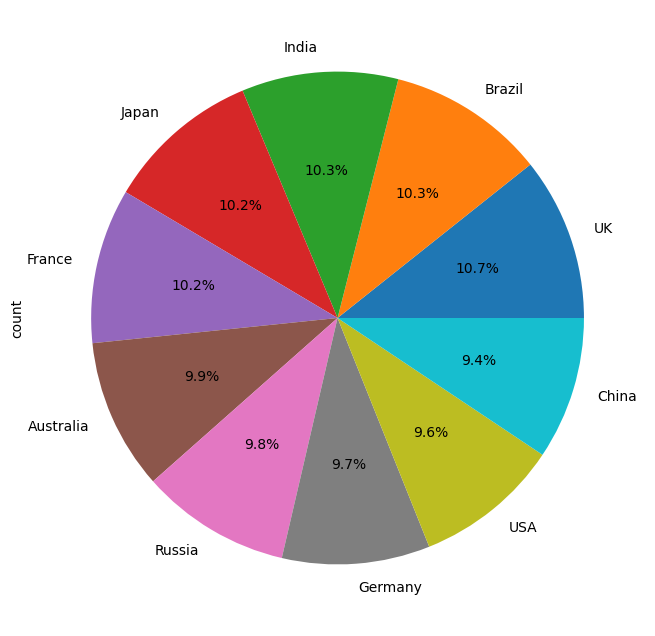

In [4]:
# countries
country_counts = df['Country'].value_counts()
country_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))

In [5]:
num = df.select_dtypes(include=np.number)
num.head()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
0,2019,80.53,773169,63
1,2019,62.19,295961,71
2,2017,38.65,605895,20
3,2024,41.44,659320,7
4,2018,74.41,810682,68


In [6]:
cat = df.select_dtypes(include=object)
cat.head()

,Country,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used
0,China,Phishing,Education,Hacker Group,Unpatched Software,VPN
1,China,Ransomware,Retail,Hacker Group,Unpatched Software,Firewall
2,India,Man-in-the-Middle,IT,Hacker Group,Weak Passwords,VPN
3,UK,Ransomware,Telecommunications,Nation-state,Social Engineering,AI-based Detection
4,Germany,Man-in-the-Middle,IT,Insider,Social Engineering,VPN


<Axes: xlabel='count', ylabel='Country'>

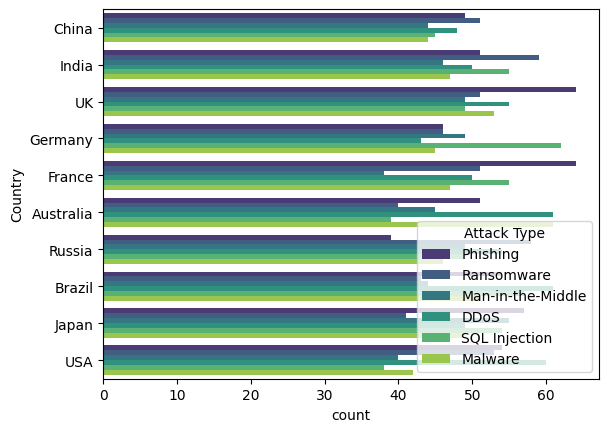

In [7]:
sns.countplot(y='Country',hue='Attack Type', data=df, palette='viridis')

<Axes: xlabel='count', ylabel='Attack Type'>

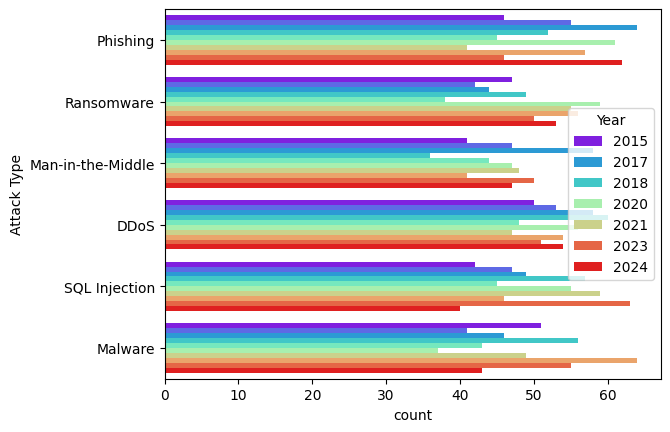

In [8]:
sns.countplot(y='Attack Type',hue='Year', data=df, palette='rainbow')

<Axes: xlabel='count', ylabel='Country'>

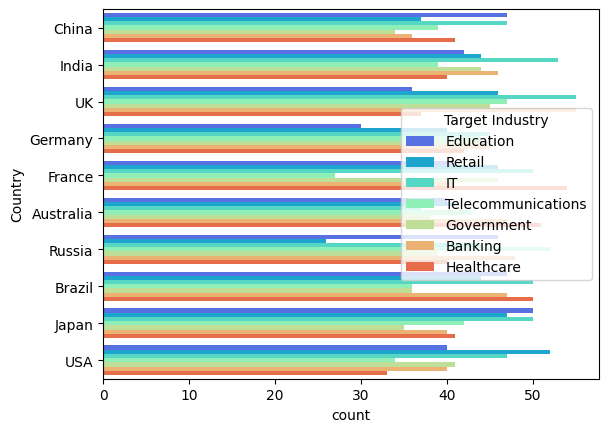

In [9]:
sns.countplot(y= 'Country', hue='Target Industry',data=df, palette='rainbow')

<Axes: xlabel='count', ylabel='Target Industry'>

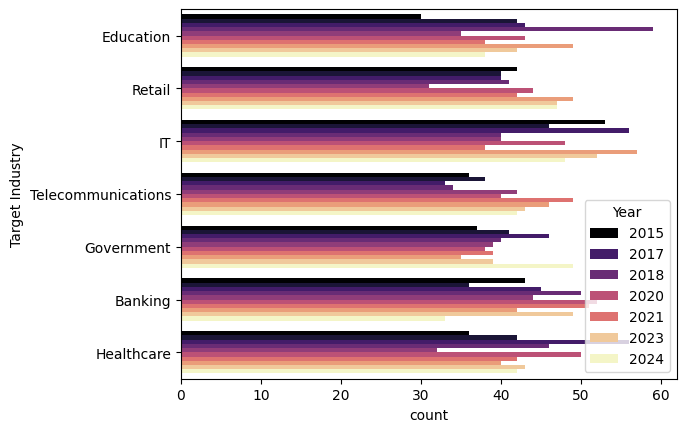

In [10]:
sns.countplot(y='Target Industry',hue='Year', data=df, palette='magma')

<Axes: xlabel='Attack Source', ylabel='count'>

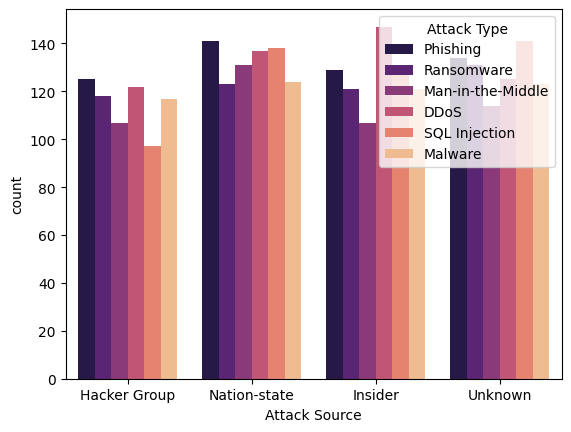

In [11]:
sns.countplot(x='Attack Source',hue='Attack Type', data=df, palette='magma')

<Axes: xlabel='Attack Source', ylabel='count'>

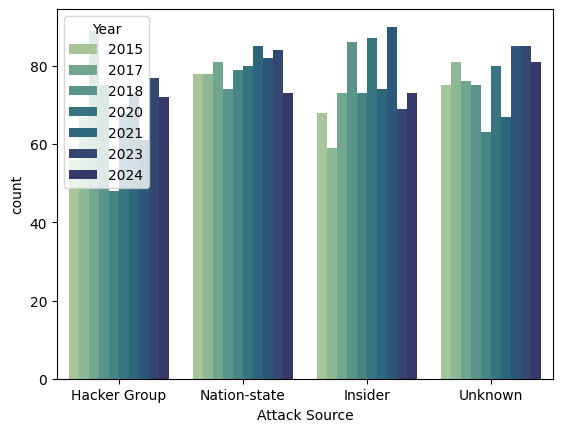

In [12]:
sns.countplot(x='Attack Source',hue='Year', data=df, palette='crest')

<Axes: xlabel='count', ylabel='Defense Mechanism Used'>

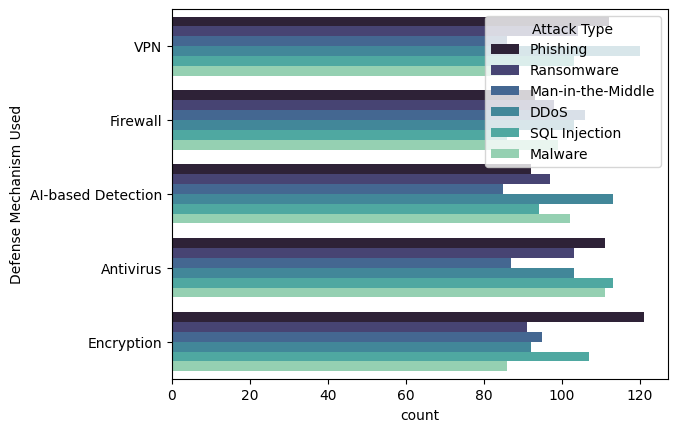

In [13]:
sns.countplot(y='Defense Mechanism Used', hue='Attack Type', data=df, palette='mako')

In [14]:
num.columns

Index(['Year', 'Financial Loss (in Million $)', 'Number of Affected Users',
       'Incident Resolution Time (in Hours)'],
      dtype='object')

<Axes: xlabel='Year', ylabel='Number of Affected Users'>

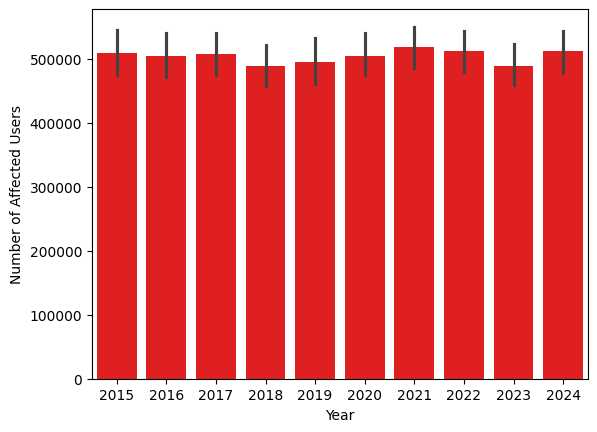

In [15]:
sns.barplot(x='Year', y='Number of Affected Users', data=df, color='red')

<Axes: xlabel='Year', ylabel='Incident Resolution Time (in Hours)'>

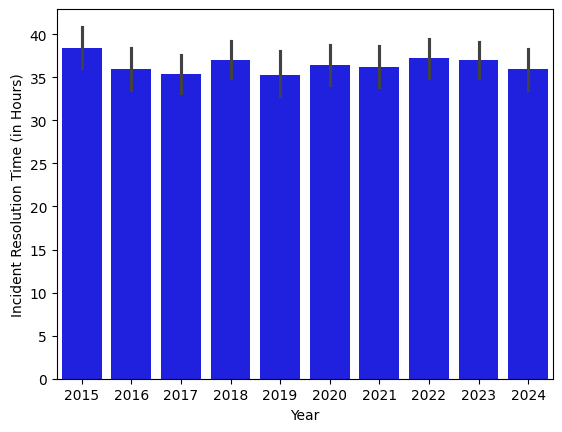

In [16]:
sns.barplot(x='Year', y='Incident Resolution Time (in Hours)', data=df, color='blue')

<Axes: xlabel='Year', ylabel='Financial Loss (in Million $)'>

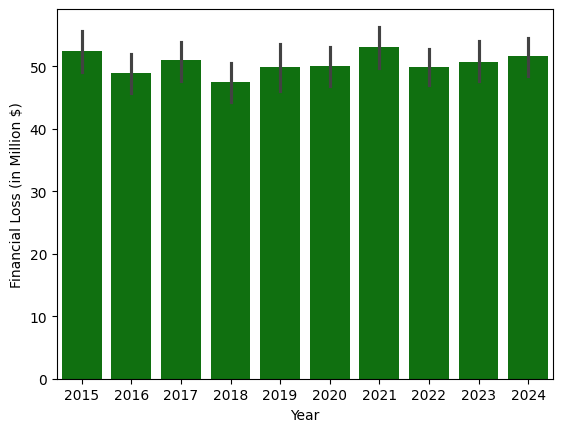

In [17]:
sns.barplot(x='Year', y='Financial Loss (in Million $)', data=df, color='green')

<Axes: xlabel='Number of Affected Users', ylabel='Financial Loss (in Million $)'>

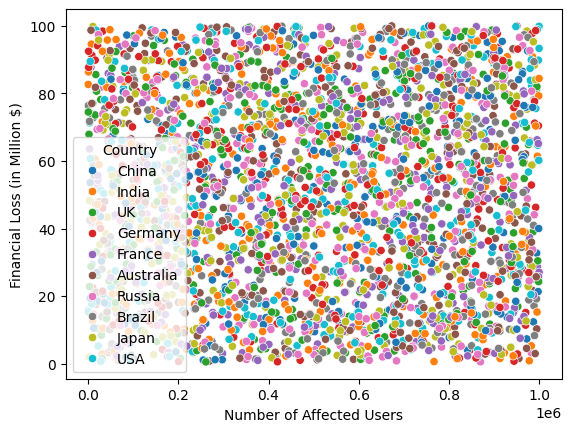

In [18]:
# bivariate analysis

sns.scatterplot(x='Number of Affected Users', y='Financial Loss (in Million $)',hue='Country', data=df, color='red')

<Axes: xlabel='Number of Affected Users'>

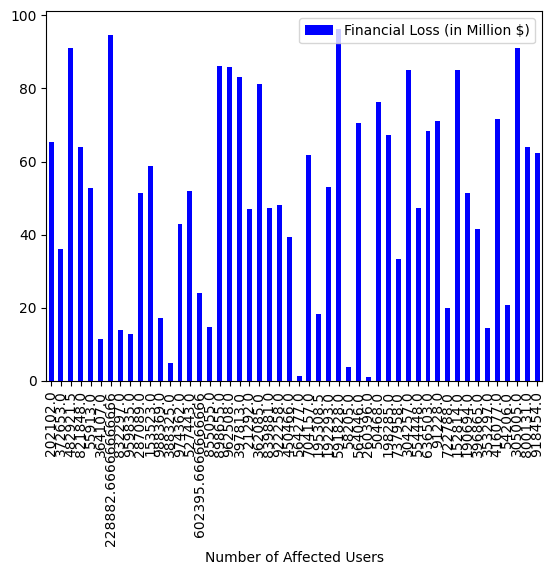

In [19]:
# financial loss vs users affected

fu = df.groupby('Financial Loss (in Million $)')['Number of Affected Users'].mean().reset_index()
fu

fu_sampled = fu.sample(50)

fu_sampled.plot(kind='bar', y='Financial Loss (in Million $)', x='Number of Affected Users', color='blue')

<Axes: xlabel='Number of Affected Users'>

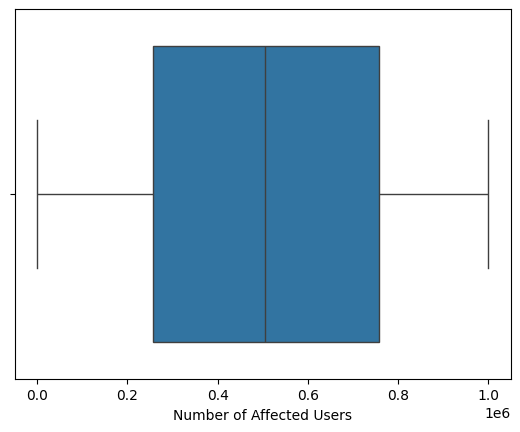

In [20]:
#detect outliers+

sns.boxplot(x=df['Number of Affected Users'])

<Axes: xlabel='Financial Loss (in Million $)'>

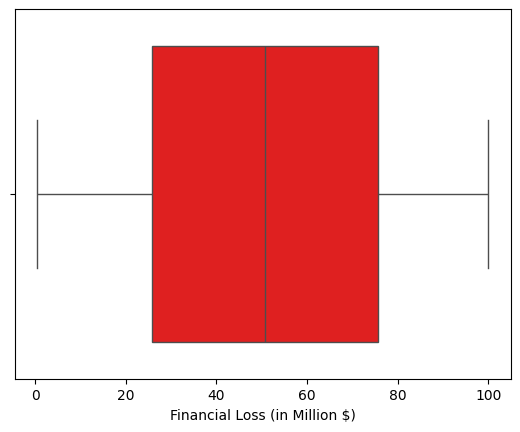

In [21]:
sns.boxplot(x=df['Financial Loss (in Million $)'], color = 'red')

In [22]:
q1 = df['Number of Affected Users'].quantile(0.25)
q3 = df['Number of Affected Users'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Number of Affected Users'] < lower_bound) | (df['Number of Affected Users'] > upper_bound)]

print("Outliers in 'Number of Affected Users':")
print(outliers)

Outliers in 'Number of Affected Users':
Empty DataFrame
Columns: [Country, Year, Attack Type, Target Industry, Financial Loss (in Million $), Number of Affected Users, Attack Source, Security Vulnerability Type, Defense Mechanism Used, Incident Resolution Time (in Hours)]
Index: []


In [23]:
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

<Axes: xlabel='Target Industry'>

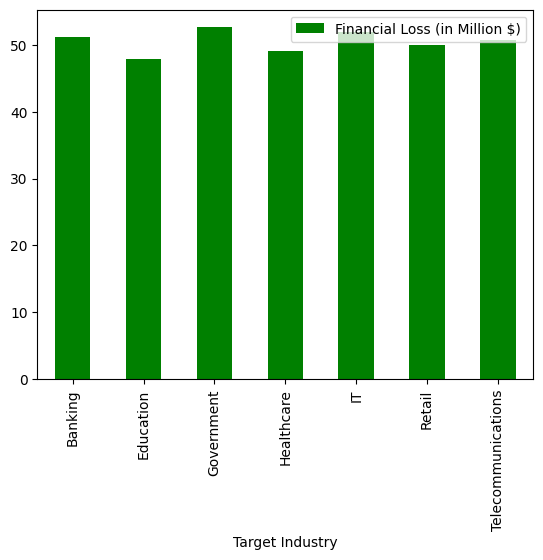

In [24]:
# target industry vs financial loss

tf = df.groupby('Target Industry')['Financial Loss (in Million $)'].mean().reset_index()
tf.plot(kind='bar', x='Target Industry', y='Financial Loss (in Million $)', color='green')


<Axes: xlabel='Target Industry'>

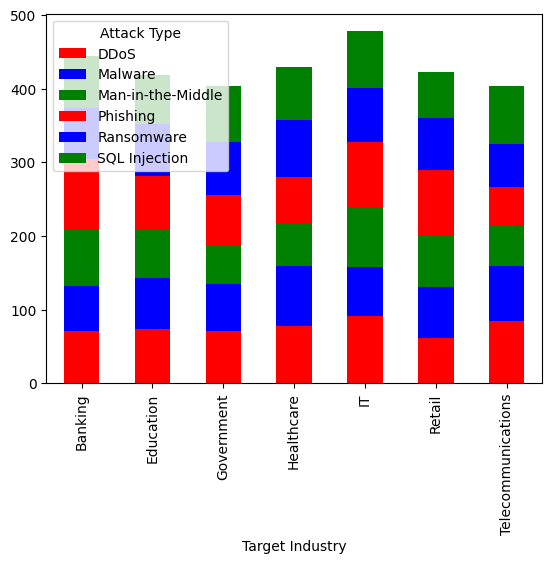

In [25]:
# target industry vs attack type

ta = df.groupby('Target Industry')['Attack Type'].value_counts().unstack().fillna(0)
ta.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])

<Axes: xlabel='Target Industry'>

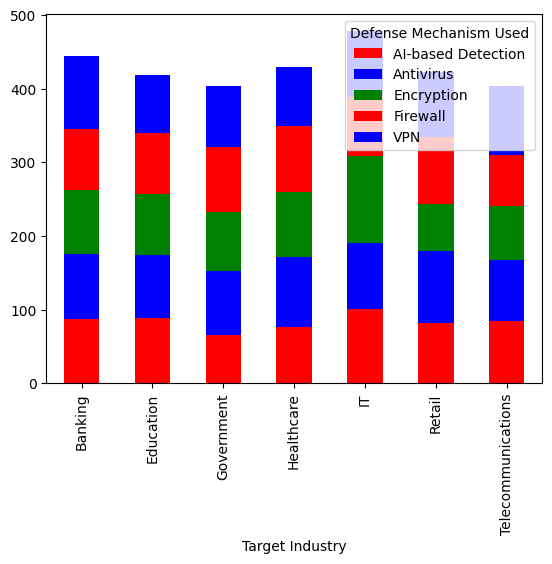

In [26]:
# target industry vs defense type
td = df.groupby('Target Industry')['Defense Mechanism Used'].value_counts().unstack().fillna(0)
td.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])


<Axes: xlabel='Security Vulnerability Type', ylabel='Target Industry'>

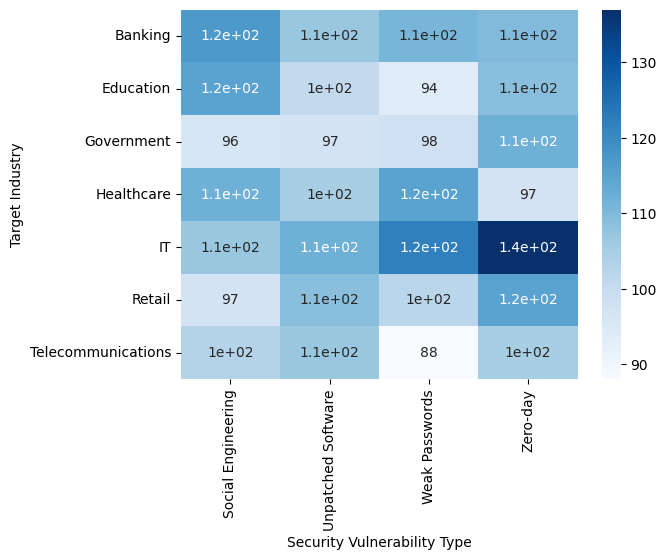

In [27]:
# target industry vs vulnerability
tv = df.groupby('Target Industry')['Security Vulnerability Type'].value_counts().unstack().fillna(0)
sns.heatmap(tv, annot=True, cmap='Blues')

<Axes: xlabel='Country'>

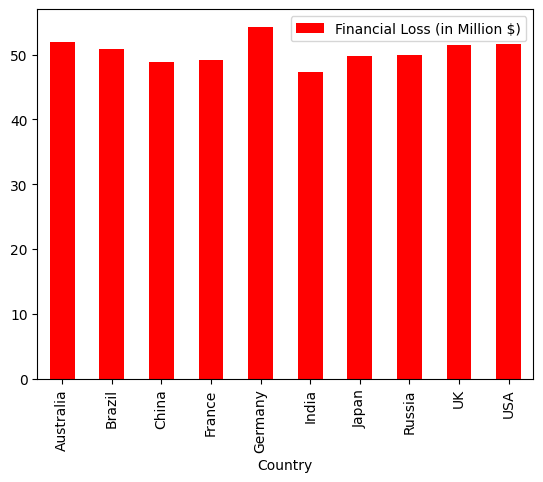

In [28]:
# financial loss vs country

fc = df.groupby('Country')['Financial Loss (in Million $)'].mean().reset_index()
fc.plot(kind='bar', x='Country', y='Financial Loss (in Million $)', color='red')

<Axes: xlabel='Attack Type'>

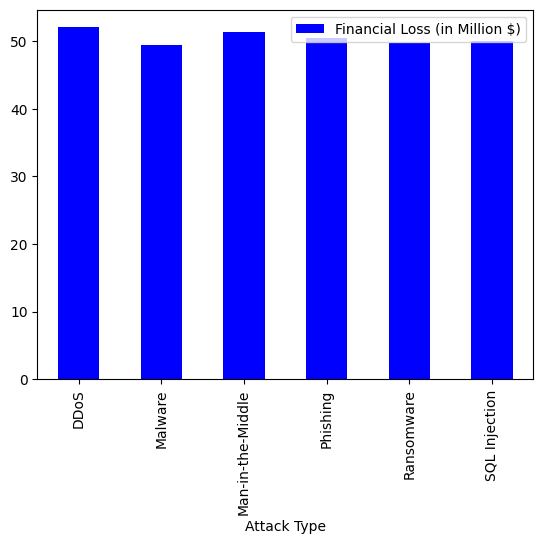

In [29]:
# financial loss vs attack type

fa = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().reset_index()
fa.plot(kind='bar', x='Attack Type', y='Financial Loss (in Million $)', color='blue')

<Axes: xlabel='Number of Affected Users'>

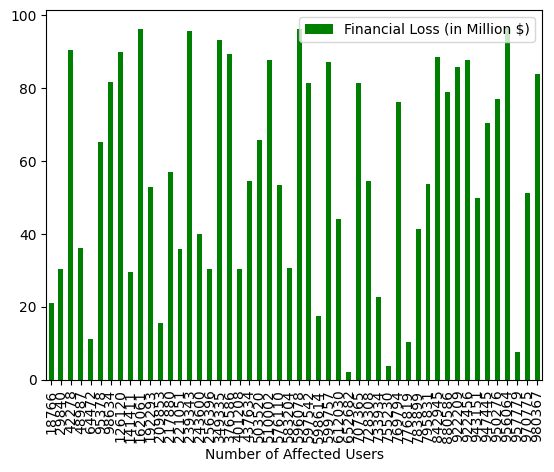

In [34]:
# financial loss vs number of affected users

fn = df.groupby('Number of Affected Users')['Financial Loss (in Million $)'].mean().reset_index()
fn_sampled = fn.sample(50).sort_values(by='Number of Affected Users')
fn_sampled.plot(kind='bar', x='Number of Affected Users', y='Financial Loss (in Million $)', color='green')


<Axes: xlabel='Attack Source'>

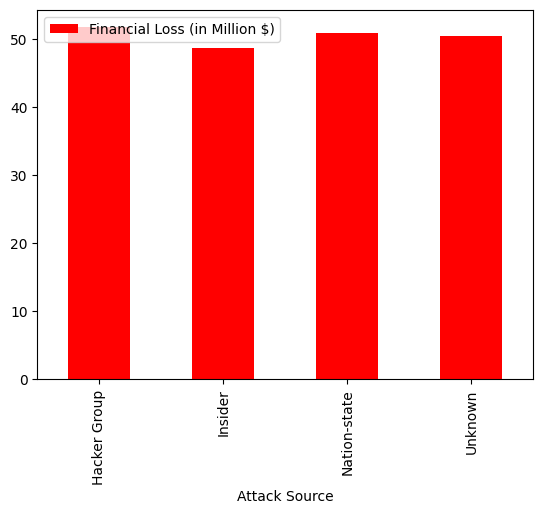

In [38]:
# financial loss vs attack source

fas = df.groupby('Attack Source')['Financial Loss (in Million $)'].mean().reset_index()
fas.plot(kind='bar', x='Attack Source', y='Financial Loss (in Million $)', color='red')


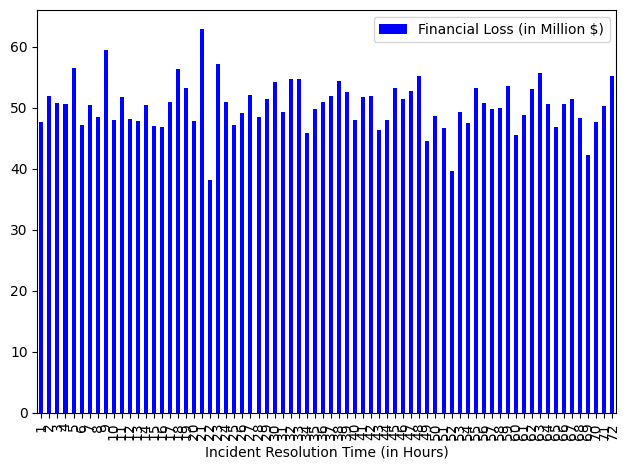

In [40]:
# financial loss vs incident resolution time
fi = df.groupby('Incident Resolution Time (in Hours)')['Financial Loss (in Million $)'].mean().reset_index()
fi.plot(kind='bar', x='Incident Resolution Time (in Hours)', y='Financial Loss (in Million $)', color='blue')
plt.tight_layout()
plt.show()

<Axes: xlabel='Attack Type'>

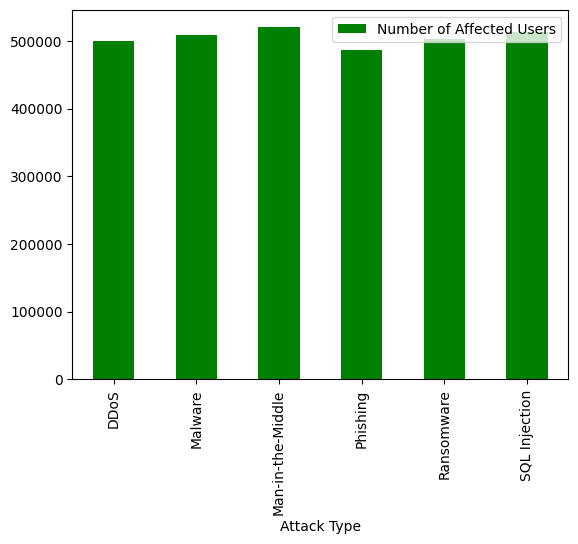

In [41]:
# attack type vs number of affected users

atu = df.groupby('Attack Type')['Number of Affected Users'].mean().reset_index()
atu.plot(kind='bar', x='Attack Type', y='Number of Affected Users', color='green')


In [42]:
# sql injection

sql = df[df['Attack Type'] == 'SQL Injection']
sql


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
7,France,2018,SQL Injection,Government,59.23,909991,Unknown,Social Engineering,Antivirus,66
11,China,2016,SQL Injection,Healthcare,38.81,920768,Hacker Group,Unpatched Software,AI-based Detection,27
30,UK,2022,SQL Injection,Education,66.24,678876,Hacker Group,Social Engineering,AI-based Detection,11
32,India,2015,SQL Injection,IT,42.99,85255,Unknown,Unpatched Software,Encryption,61
37,Japan,2021,SQL Injection,Retail,82.52,214372,Insider,Unpatched Software,Encryption,12
...,...,...,...,...,...,...,...,...,...,...
2993,Germany,2017,SQL Injection,Education,54.98,786577,Insider,Unpatched Software,Firewall,70
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [43]:
sql.to_csv('sql.csv', index=False)

<Axes: xlabel='Attack Type', ylabel='count'>

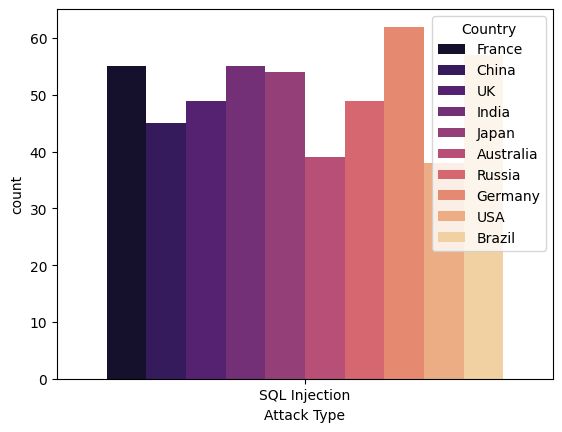

In [44]:
sns.countplot(x='Attack Type', hue='Country', data=sql, palette='magma')

In [45]:
#ddos

ddos = df[df['Attack Type'] == 'DDoS']
ddos

ddos.to_csv('ddos.csv', index=False)



<Axes: xlabel='Attack Type', ylabel='count'>

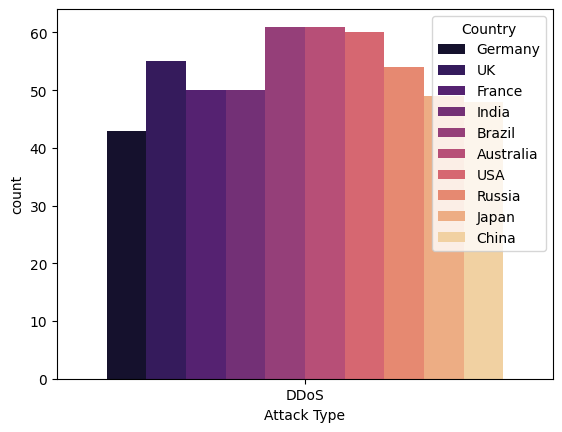

In [47]:
sns.countplot(x='Attack Type', hue='Country', data=ddos, palette='magma')

In [60]:
# attack source analysis

ats = df.groupby('Attack Source')['Attack Type'].value_counts()

atsource = df['Attack Source'].value_counts()

<Axes: ylabel='count'>

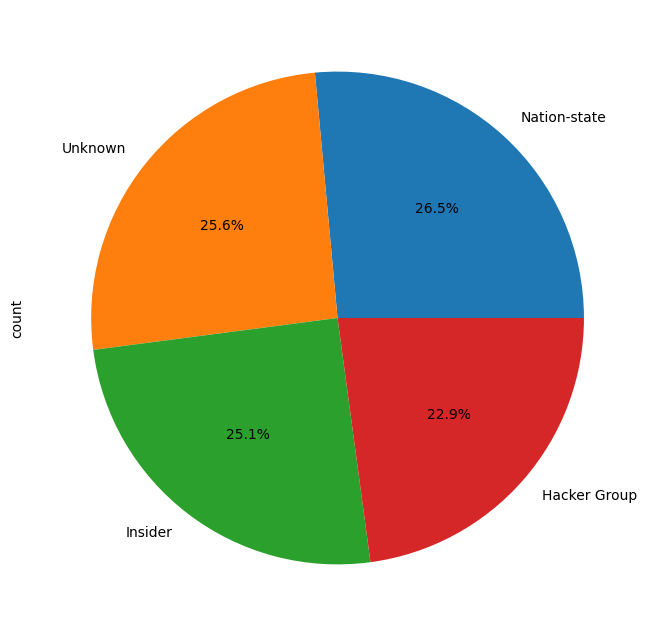

In [61]:
atsource.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))

### MULTIVARIATE ANALYSIS

In [52]:
corr = num.corr()
corr.style.background_gradient(cmap='Blues')

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
Year,1.000000,0.010581,0.002317,-0.004982
Financial Loss (in Million $),0.010581,1.000000,0.001787,-0.012671
Number of Affected Users,0.002317,0.001787,1.000000,0.005893
Incident Resolution Time (in Hours),-0.004982,-0.012671,0.005893,1.000000


<Axes: >

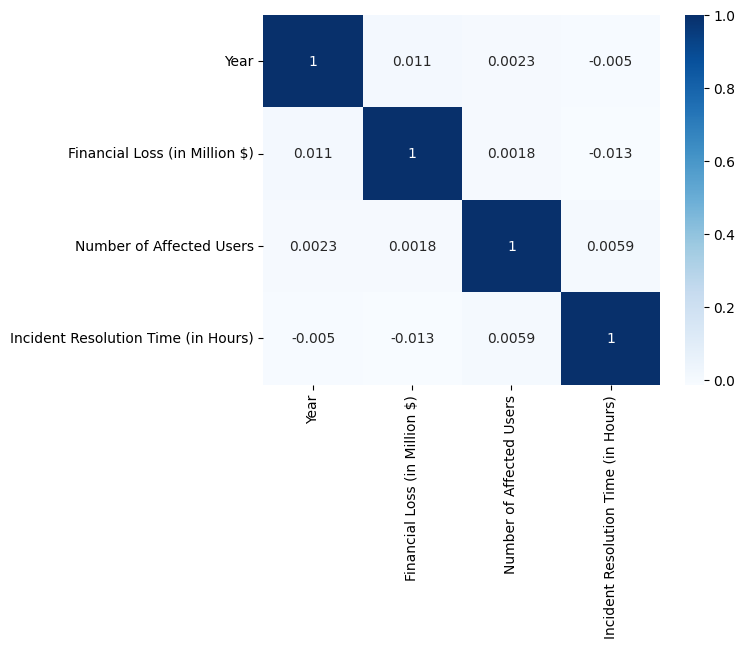

In [53]:
sns.heatmap(corr, annot=True, cmap='Blues')

### STATISTICAL ANALYSIS

In [62]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [72]:
stats = {'Mean: ': num.mean(),
         'Median: ': num.median(),
         'Mode: ': num.mode(),
         'Standard Deviation: ': num.std(),
         'Kurtosis:': num.kurt(),
         'Skewness': num.skew()}
stats

{'Mean: ': Year                                     2019.570333
 Financial Loss (in Million $)              50.492970
 Number of Affected Users               504684.136333
 Incident Resolution Time (in Hours)        36.476000
 dtype: float64,
 'Median: ': Year                                     2020.000
 Financial Loss (in Million $)              50.795
 Number of Affected Users               504513.000
 Incident Resolution Time (in Hours)        37.000
 dtype: float64,
 'Mode: ':      Year  Financial Loss (in Million $)  Number of Affected Users  \
 0  2017.0                          17.99                    164890   
 1     NaN                            NaN                    737958   
 
    Incident Resolution Time (in Hours)  
 0                                 43.0  
 1                                  NaN  ,
 'Standard Deviation: ': Year                                        2.857932
 Financial Loss (in Million $)              28.791415
 Number of Affected Users               

In [67]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [68]:
df['Attack Type'] = pd.to_numeric(df['Attack Type'], errors = 'coerce')
attack_type = df.dropna()

attack_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              0 non-null      object 
 1   Year                                 0 non-null      int64  
 2   Attack Type                          0 non-null      float64
 3   Target Industry                      0 non-null      object 
 4   Financial Loss (in Million $)        0 non-null      float64
 5   Number of Affected Users             0 non-null      int64  
 6   Attack Source                        0 non-null      object 
 7   Security Vulnerability Type          0 non-null      object 
 8   Defense Mechanism Used               0 non-null      object 
 9   Incident Resolution Time (in Hours)  0 non-null      int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 0.0+ bytes


In [69]:
df['Defense Mechanism Used'] = pd.to_numeric(df['Defense Mechanism Used'], errors = 'coerce')
defence = df.dropna()

defence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              0 non-null      object 
 1   Year                                 0 non-null      int64  
 2   Attack Type                          0 non-null      float64
 3   Target Industry                      0 non-null      object 
 4   Financial Loss (in Million $)        0 non-null      float64
 5   Number of Affected Users             0 non-null      int64  
 6   Attack Source                        0 non-null      object 
 7   Security Vulnerability Type          0 non-null      object 
 8   Defense Mechanism Used               0 non-null      float64
 9   Incident Resolution Time (in Hours)  0 non-null      int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 0.0+ bytes


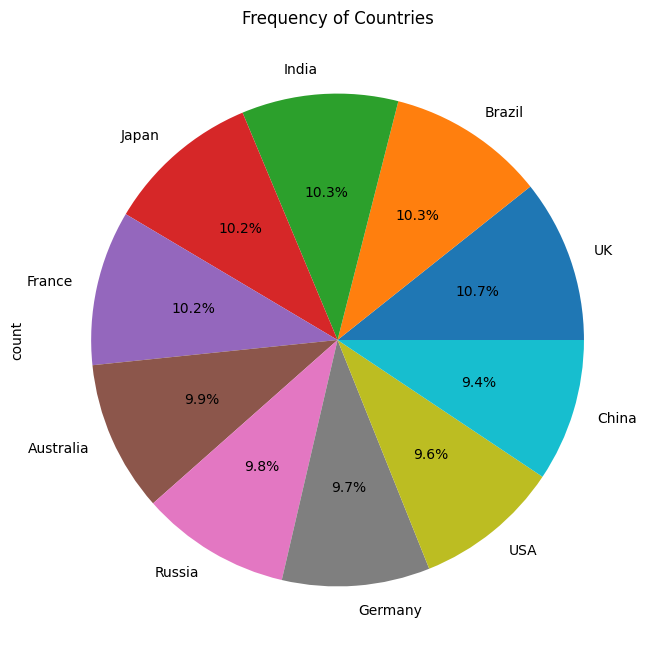

In [81]:
# frequency of categorical columns

country_counts = df['Country'].value_counts()
country_counts
country_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Frequency of Countries')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'China'),
  Text(1, 0, 'India'),
  Text(2, 0, 'UK'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Russia'),
  Text(7, 0, 'Brazil'),
  Text(8, 0, 'Japan'),
  Text(9, 0, 'USA')])

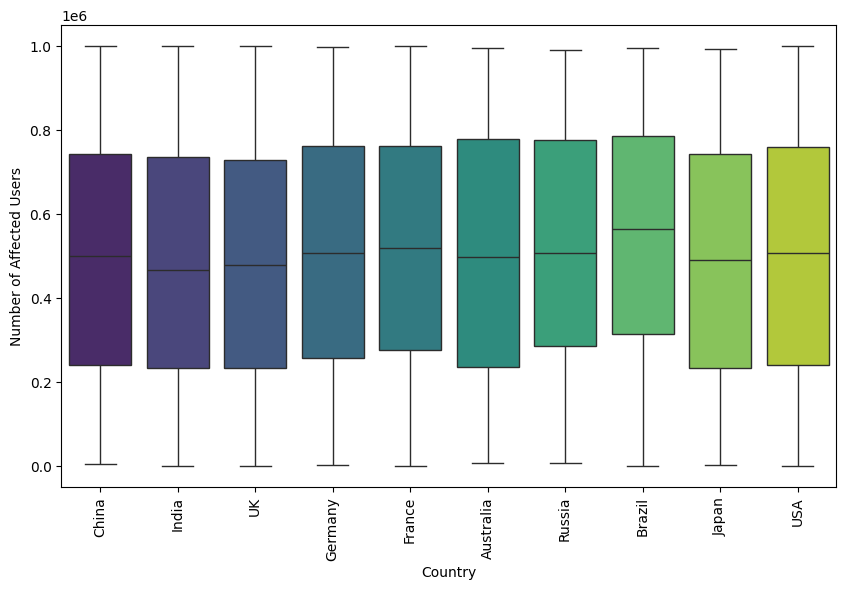

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='Number of Affected Users', data=df, palette='viridis')
plt.xticks(rotation=90)

In [93]:
# T-test
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(df['Number of Affected Users'], df['Financial Loss (in Million $)'])
print("T-statistic:", t_statistic)
print("P-value:", p_value)



T-statistic: 95.32845907518218
P-value: 0.0


In [96]:
# ANOVA

from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(df['Number of Affected Users'], df['Financial Loss (in Million $)'], df['Incident Resolution Time (in Hours)'])
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 9087.767490524946
P-value: 0.0


according to this analysis, the correlation is so high that the p value is rounded to zero

In [105]:
# hypothesis testing

#h0 = financial losses are the result of cyberattacks
from scipy import stats

# mean of financial loss
mu = num['Financial Loss (in Million $)'].mean()

# sample mean
x_bar = num['Financial Loss (in Million $)'].mean()

# sample standard deviation
s = num['Financial Loss (in Million $)'].std()

# Sample Size
N1 = 21

# Degrees of freedom
dof = N1 - 1

# Generate a random sample with mean = 11 and standard deviation = 1
x = np.random.randn(N1) + 11

# Using the Stats library, compute t-statistic and p-value
t_stat, p_val = stats.ttest_1samp(a=x, popmean = mu)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = -191.1825769996609
p-value = 4.2175924859285225e-34


p value is near 0.0000000000000000000000000000000000421759...so should be rounded to zero, and this means the financial losses are correlated to cyberattacks in statistical manner.


### LINEAR REGRESSION

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x = num.drop(['Financial Loss (in Million $)'], axis=1)
y = num['Financial Loss (in Million $)']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

L = LinearRegression()
L.fit(x_train, y_train)

y_pred = L.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 809.2088177351918
R-squared: -0.0007113302336503313


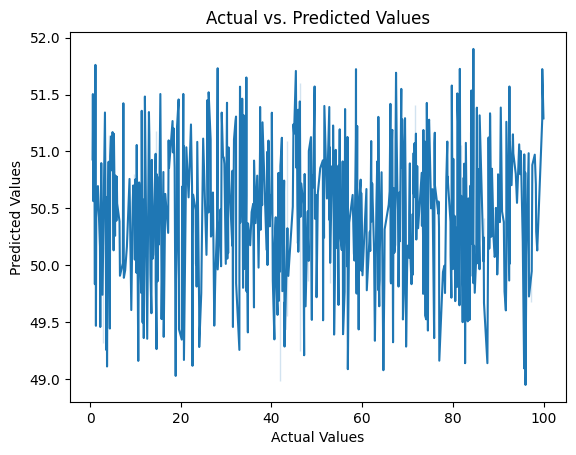

In [110]:
sns.lineplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()